In [41]:
import numpy as np
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from Utils import plot_pdf_stats

In [42]:
df = pl.read_csv("dataSPX.csv")

In [43]:
df = df.with_columns(
    pl.col("xltime").str.strptime(pl.Datetime, "%+")
)

df = df.with_columns(
    (pl.col("xltime").dt.timestamp()/ 1e3).diff().alias("dt_ms")
)

df

xltime,trade-price,trade-volume,bid-price,bid-volume,ask-price,ask-volume,dt_ms
"datetime[μs, UTC]",f64,f64,f64,i64,f64,i64,f64
2017-01-03 14:00:00.158 UTC,224.8,650.0,224.8,9,224.83,12,null
2017-01-03 14:00:00.346 UTC,224.83,91.0,224.8,1,224.83,3,188.0
2017-01-03 14:00:05.709 UTC,224.8,140.0,224.49,2,224.83,3,5363.0
2017-01-03 14:00:05.719 UTC,224.49,110.0,224.14,100,224.83,3,10.0
2017-01-03 14:00:50.549 UTC,224.83,309.0,224.83,89,224.87,20,44830.0
…,…,…,…,…,…,…,…
2017-01-04 04:51:56.253 UTC,225.2,1000.0,225.19,45,225.2,40,118126.0
2017-01-04 04:51:56.413 UTC,225.2,1000.0,225.19,45,225.2,30,160.0
2017-01-04 04:51:56.763 UTC,225.2,1000.0,225.19,45,225.2,10,350.0


In [44]:
def create_volume_TS(df):
    vol_TS = df.select(["dt_ms","trade-price", "trade-volume"])
    
    vol_TS = vol_TS.with_columns(
        (pl.col("trade-volume").diff()/pl.col("dt_ms")).alias("vol_diff/dt_ms"),
        (pl.col("trade-price").diff()*pl.col("dt_ms").mean()/pl.col("dt_ms").diff()).alias("price_diff/time_ms*avg_t")
    )
    
    return vol_TS    

In [45]:
volume_df = create_volume_TS(df).drop_nulls()
volume_df.describe()

statistic,dt_ms,trade-price,trade-volume,vol_diff/dt_ms,price_diff/time_ms*avg_t
str,f64,f64,f64,f64,f64
"""count""",24234.0,24234.0,24234.0,24234.0,24234.0
"""null_count""",0.0,0.0,0.0,0.0,0.0
"""mean""",2216.763679,224.721348,816.199884,-13.182502,NaN
"""std""",17956.329981,0.462669,1685.002607,680.915392,NaN
"""min""",1.0,223.89,1.0,-24665.0,-inf
"""25%""",22.0,224.29,100.0,-1.626016,-5.2197e-14
"""50%""",313.0,224.73,301.0,0.0,0.0
"""75%""",1171.0,225.06,820.0,0.892857,2.0323e-14
"""max""",1.113232e6,225.83,49500.0,41302.0,inf


Mean: -13.18250171764923
Median: 0.0
Standard Deviation: 680.9153919837485


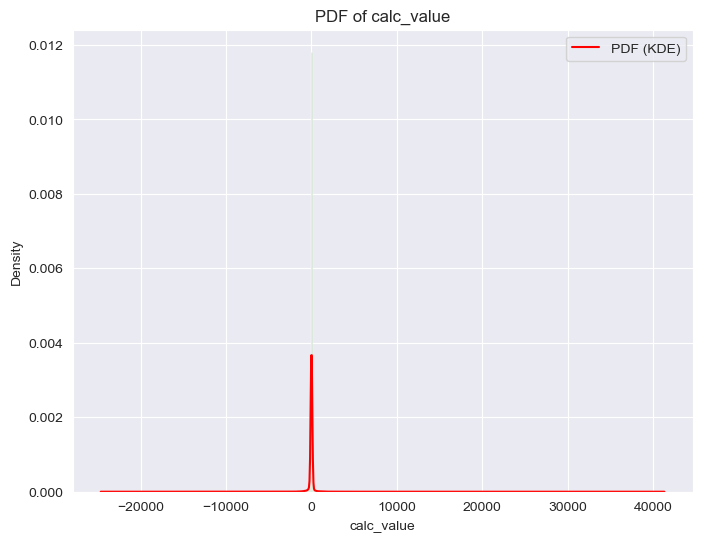

In [46]:
plot_pdf_stats(df=volume_df, x_col_name="vol_diff/dt_ms")

We will assume that each stock has a volume std that is computed using past inputs 
\
For now I will use the vol_std of the day in the current day -> not right
\
Same is done with the mean

Number of times in position: 16
[0.34714286]


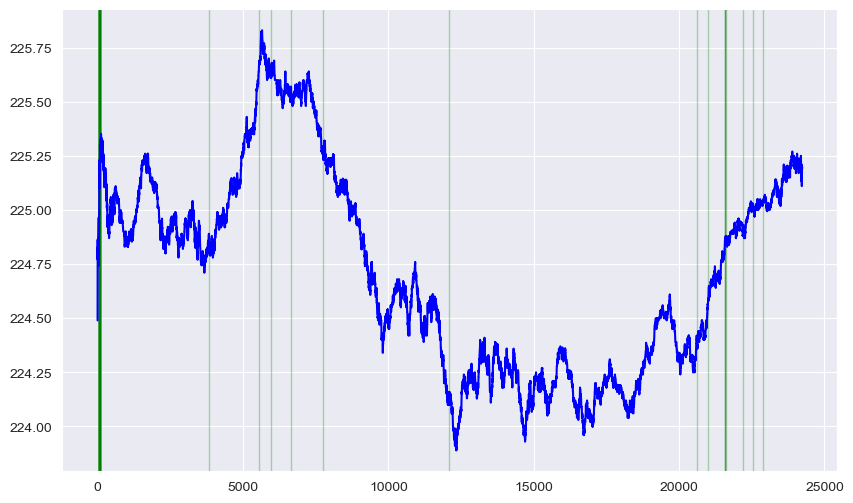

In [56]:

def trade_vol_std(df, thresh, stock_vol_mean, stock_vol_std):
    df = df.with_columns(
        (pl.when(pl.col("vol_diff/dt_ms")>stock_vol_mean+thresh*stock_vol_std).then(1).otherwise(pl.when(pl.col("vol_diff/dt_ms")<stock_vol_mean-thresh*stock_vol_std).then(-1).otherwise(0))).alias("trading_scheme_enter").shift()
    )
    
    df = df.with_columns(
        (pl.when(pl.col("vol_diff/dt_ms")<stock_vol_mean).then(1).otherwise(pl.when(pl.col("vol_diff/dt_ms")>stock_vol_mean).then(-1).otherwise(0))).alias("trading_scheme_leave").shift()
    )
    
    df = df.drop_nulls()
    
    enter_scheme = df.select(["trading_scheme_enter"]).to_numpy()
    leave_scheme = df.select(["trading_scheme_leave"]).to_numpy()
    stock_price = df.select(["trade-price"]).to_numpy()
    
    
    positions = np.zeros(len(df))
    
    in_position = False
    position_count = 0
    value = 0
    
    for i in range(len(df)):
        if enter_scheme[i] == 1 and not in_position:
            
            value -= stock_price[i]
            in_position = True
            position_count +=1
            positions[i] = 1
        
        elif leave_scheme[i] == 1 and in_position:
            value += stock_price[i]
            in_position = False
        
        elif in_position:
            positions[i] = 1
    
    print(f"Number of times in position: {position_count}")
    
    time = np.arange(len(df))  # Use row indices as time axis
    
    plt.figure(figsize=(10, 6))
    plt.plot(time, stock_price, label="Stock Price", color="blue")
    
    for i in range(1, len(df)):
        if positions[i-1] == 1:
            plt.axvspan(i-1, i, color='green', alpha=0.3)
    
    return df, value
da, value = trade_vol_std(df=volume_df, thresh=10, stock_vol_mean=-13.1825, stock_vol_std=680.91539)
da.describe()
print(value)

In [26]:
da

dt_ms,trade-price,trade-volume,vol_diff/dt_ms,price_diff/time_ms*avg_t,trading_scheme_enter,trading_scheme_leave,in_position
f64,f64,f64,f64,f64,i32,i32,i32
5363.0,224.8,140.0,0.009137,-0.01285,null,null,0
10.0,224.49,110.0,-3.0,0.128371,0,-1,0
44830.0,224.83,309.0,0.004439,0.016816,0,-1,0
31.0,224.83,265.0,-1.419355,-0.0,0,-1,0
25858.0,224.863333,50.0,-0.008315,0.002861,0,-1,0
…,…,…,…,…,…,…,…
118126.0,225.2,1000.0,0.006764,0.000399,0,-1,0
160.0,225.2,1000.0,0.0,-5.3407e-16,0,-1,0
350.0,225.2,1000.0,0.0,0.0,0,-1,0
